# Onion Leaf Deficiency Identification System using Convolutional Neural Network

#### Objective of the Study

This thesis study aims to identify onion leaf deficiencies using Image Processing and ResNet50 transfer learning. The following classes are Nitrogen, Potassium, Phosphorus and the Nondeficient variant. The dataset used in the study are custom made by the researchers.

### 1. Importing Libraries

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pandas as pd

from pathlib import Path
import os
import warnings
from datetime import datetime


In [15]:
# remove warnings notif
warnings.filterwarnings("ignore", category=FutureWarning)

### 2. Assigning the Path and Initializing ResNet50 architecture

In [16]:
train_path = "C:/Users/Kobe-PC\Desktop\Animal Classification - Testing/ds"

In [17]:
resnet50 = ResNet50(include_top=False,
                            weights='imagenet', input_shape=(224,224,3))
for layer in resnet50.layers:
    layer.trainable = False

folders = glob("C:/Users/Kobe-PC\Desktop\Animal Classification - Testing/ds/*")
print(len(folders))

4


In [23]:
r50 = Sequential()

r50.add(resnet50)
r50.add(Flatten())
r50.add(Dense(512, activation='relu'))
r50.add(Dense(4, activation='softmax'))

In [24]:
r50.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 512)               51380736  
                                                                 
 dense_8 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 74,970,500
Trainable params: 51,382,788
Non-trainable params: 23,587,712
_________________________________________________________________


In [43]:
from tensorflow.keras.optimizers import Adam

adam = optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])

### 3. Setting up Image Augmentation

In [44]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  rescale=1./255., width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip=True,
                                  vertical_flip=True, validation_split=0.2, 
                                  fill_mode='nearest')

In [67]:
train_set = train_datagen.flow_from_directory(train_path, 
                                             target_size=(224,224),
                                             batch_size=64, shuffle=True,
                                             subset='training',
                                             class_mode='categorical')

test_set = train_datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=64, shuffle=True,
                                            subset='validation',
                                            class_mode='categorical')

print(train_set.class_indices)

Found 1280 images belonging to 4 classes.
Found 320 images belonging to 4 classes.
{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3}


### 4. Compiling and Training the Model

In [46]:
checkpoint = ModelCheckpoint(filepath='animal-classification_v1.h5', verbose=2,
                            save_best_only=True)

callbacks = [checkpoint]
start = datetime.now()

In [47]:
model_history = model.fit(train_set, validation_data=test_set, epochs=100, 
                          #steps_per_epoch=8, validation_steps=3
                                 callbacks=callbacks, verbose=1)

duration = datetime.now() - start

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.6009 - accuracy: 0.7688
Epoch 1: val_loss improved from inf to 0.70126, saving model to animal-classification_v1.h5
20/20 [==============================] - 18s 776ms/step - loss: 0.6009 - accuracy: 0.7688 - val_loss: 0.7013 - val_accuracy: 0.7563
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5462 - accuracy: 0.7773
Epoch 2: val_loss improved from 0.70126 to 0.64314, saving model to animal-classification_v1.h5
20/20 [==============================] - 15s 738ms/step - loss: 0.5462 - accuracy: 0.7773 - val_loss: 0.6431 - val_accuracy: 0.7719
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.5445 - accuracy: 0.7859
Epoch 3: val_loss improved from 0.64314 to 0.63698, saving model to animal-classification_v1.h5
20/20 [==============================] - 15s 731ms/step - loss: 0.5445 - accuracy: 0.7859 - val_loss: 0.6370 - val_accuracy: 0.7406
Epoch 4/100
20/20 [================

20/20 [==============================] - ETA: 0s - loss: 0.4716 - accuracy: 0.8227
Epoch 29: val_loss did not improve from 0.58601
20/20 [==============================] - 15s 728ms/step - loss: 0.4716 - accuracy: 0.8227 - val_loss: 0.6389 - val_accuracy: 0.7437
Epoch 30/100
20/20 [==============================] - ETA: 0s - loss: 0.5065 - accuracy: 0.8195
Epoch 30: val_loss did not improve from 0.58601
20/20 [==============================] - 14s 714ms/step - loss: 0.5065 - accuracy: 0.8195 - val_loss: 0.6267 - val_accuracy: 0.7844
Epoch 31/100
20/20 [==============================] - ETA: 0s - loss: 0.5025 - accuracy: 0.8133
Epoch 31: val_loss improved from 0.58601 to 0.56456, saving model to animal-classification_v1.h5
20/20 [==============================] - 15s 742ms/step - loss: 0.5025 - accuracy: 0.8133 - val_loss: 0.5646 - val_accuracy: 0.8000
Epoch 32/100
20/20 [==============================] - ETA: 0s - loss: 0.5010 - accuracy: 0.8070
Epoch 32: val_loss did not improve from 

20/20 [==============================] - 15s 738ms/step - loss: 0.4836 - accuracy: 0.8086 - val_loss: 0.6179 - val_accuracy: 0.7750
Epoch 59/100
20/20 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.8117
Epoch 59: val_loss did not improve from 0.56076
20/20 [==============================] - 15s 728ms/step - loss: 0.4900 - accuracy: 0.8117 - val_loss: 0.6170 - val_accuracy: 0.7594
Epoch 60/100
20/20 [==============================] - ETA: 0s - loss: 0.4990 - accuracy: 0.8148
Epoch 60: val_loss did not improve from 0.56076
20/20 [==============================] - 15s 726ms/step - loss: 0.4990 - accuracy: 0.8148 - val_loss: 0.5827 - val_accuracy: 0.7688
Epoch 61/100
20/20 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.8148
Epoch 61: val_loss did not improve from 0.56076
20/20 [==============================] - 14s 716ms/step - loss: 0.4947 - accuracy: 0.8148 - val_loss: 0.6626 - val_accuracy: 0.7375
Epoch 62/100
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 0.5182 - accuracy: 0.8047
Epoch 88: val_loss did not improve from 0.53867
20/20 [==============================] - 14s 713ms/step - loss: 0.5182 - accuracy: 0.8047 - val_loss: 0.6443 - val_accuracy: 0.7656
Epoch 89/100
20/20 [==============================] - ETA: 0s - loss: 0.4484 - accuracy: 0.8414
Epoch 89: val_loss did not improve from 0.53867
20/20 [==============================] - 15s 723ms/step - loss: 0.4484 - accuracy: 0.8414 - val_loss: 0.6067 - val_accuracy: 0.7875
Epoch 90/100
20/20 [==============================] - ETA: 0s - loss: 0.4578 - accuracy: 0.8313
Epoch 90: val_loss did not improve from 0.53867
20/20 [==============================] - 15s 726ms/step - loss: 0.4578 - accuracy: 0.8313 - val_loss: 0.5634 - val_accuracy: 0.8062
Epoch 91/100
20/20 [==============================] - ETA: 0s - loss: 0.5171 - accuracy: 0.7906
Epoch 91: val_loss did not improve from 0.53867
20/20 [==============================] - 

### 5. Plotting the Accuracy and Loss of the Trained Model

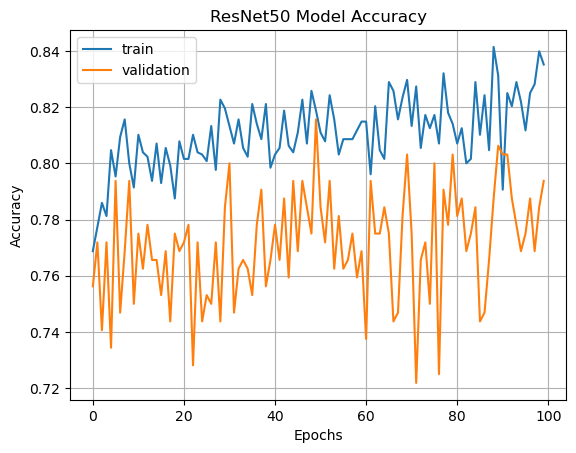

In [48]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.grid()
plt.title('ResNet50 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

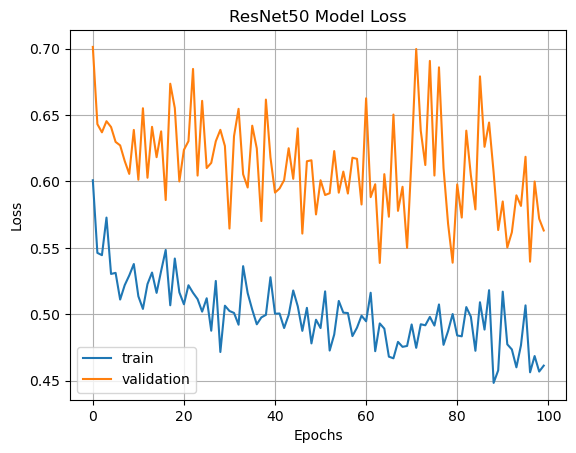

In [49]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.grid()
plt.title('ResNet50 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

### 6. Loading the Saved Model

In [226]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

model = load_model("C:\\Users\\Kobe-PC\\Desktop\\Animal Classification - Testing\\animal-classification_v1.h5", compile=True)


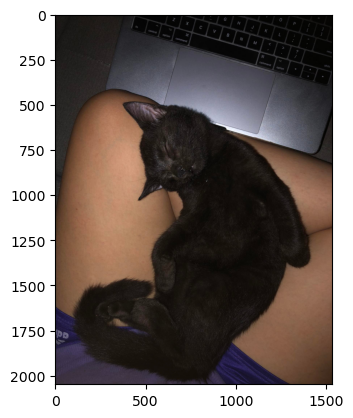

In [297]:
import cv2
import matplotlib.image as mpimg
#image = cv2.imread('C:\\Users\\Kobe-PC\\Desktop\\thesis-files\\test-data\\Nitrogen\\1.jpeg')

pred1 = 'C:/Users/Kobe-PC/Desktop/Animal Classification - Testing/test/arielle-4.jpg'
pred2 = 'C:/Users/Kobe-PC/Desktop/Animal Classification - Testing/test/butt-2.jpg'
pred3 = 'C:/Users/Kobe-PC/Desktop/Animal Classification - Testing/test/chick-3.jpeg'


img = mpimg.imread(pred1)
imgplot = plt.imshow(img)
plt.show()

In [298]:
from keras.utils import img_to_array, load_img

test_img = load_img(pred1, target_size=(224,224))
test_img = img_to_array(test_img)/255
test_img = np.expand_dims(test_img, axis=0)

print(test_img.shape)


(1, 224, 224, 3)


In [299]:
pred = model.predict(test_img)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[0.20610675 0.1570095  0.5699534  0.40599307]]


In [300]:
pred = [np.argmax(pred)]
print(pred)

[2]


In [301]:
print(train_set.class_indices)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3}


In [302]:
if pred == [0]:
    print("It is a butterfly")
elif pred == [1]:
    print("It is a cat")
elif pred == [2]:
    print("It is a chicken")
elif pred == [3]:
    print("It is a cow")
else:
    print("Error")

It is a chicken


In [303]:
loss, acc = model.evaluate(train_set, verbose=1)
print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % acc)

20/20 [==============================] - 13s 565ms/step - loss: 0.4867 - accuracy: 0.8094
Test loss: 0.4867
Test accuracy: 0.8094
